## Evaluation du ANN en utilisation l'intervale de confiance

---
[![GitHub](https://img.shields.io/badge/GitHub-%23121011.svg?&style=for-the-badge&logo=GitHub&logoColor=white)](https://github.com/YassineOurara/Explosion-induced-vibrations-AI-Prediction)


---




###Imporation des données

In [ ]:
# data <- read.csv('/content/ppvSd.csv')

In [ ]:
data <- read.csv('/content/data_aug_SD.csv')

In [ ]:
data_train <- read.csv('/content/Xaug_SD-y_train.csv')

In [ ]:
data_test <- read.csv('/content/Xaug_SD_test.csv')

In [ ]:
# # Function to replace commas with periods in all elements of a dataframe
# replace_commas <- function(df) {
#   df[] <- lapply(df, function(x) {
#     if (is.character(x)) {
#       as.numeric(gsub(",", ".", x))
#     } else {
#       x
#     }
#   })
#   return(df)
# }

# data_train <- replace_commas(data_train)

In [ ]:
# # Suppression des lignes où ST < 10
# data <- subset(data, PPV < 10)
# # Vérification des résultats
# data

###Affichage de l'intervale et nuage de points

#### Nuage de points du DataSet dans l'intervale de confiance


Call:
lm(formula = PPV ~ SD, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4316 -1.0219 -0.2896  0.7581  6.6702 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.857256   0.172851   39.67   <2e-16 ***
SD          -0.032140   0.001381  -23.27   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.614 on 2361 degrees of freedom
Multiple R-squared:  0.1865,	Adjusted R-squared:  0.1862 
F-statistic: 541.3 on 1 and 2361 DF,  p-value: < 2.2e-16


Warning message in predict.lm(model, interval = "prediction", level = 0.95):
“predictions on current data refer to _future_ responses
”
`geom_smooth()` using formula = 'y ~ x'


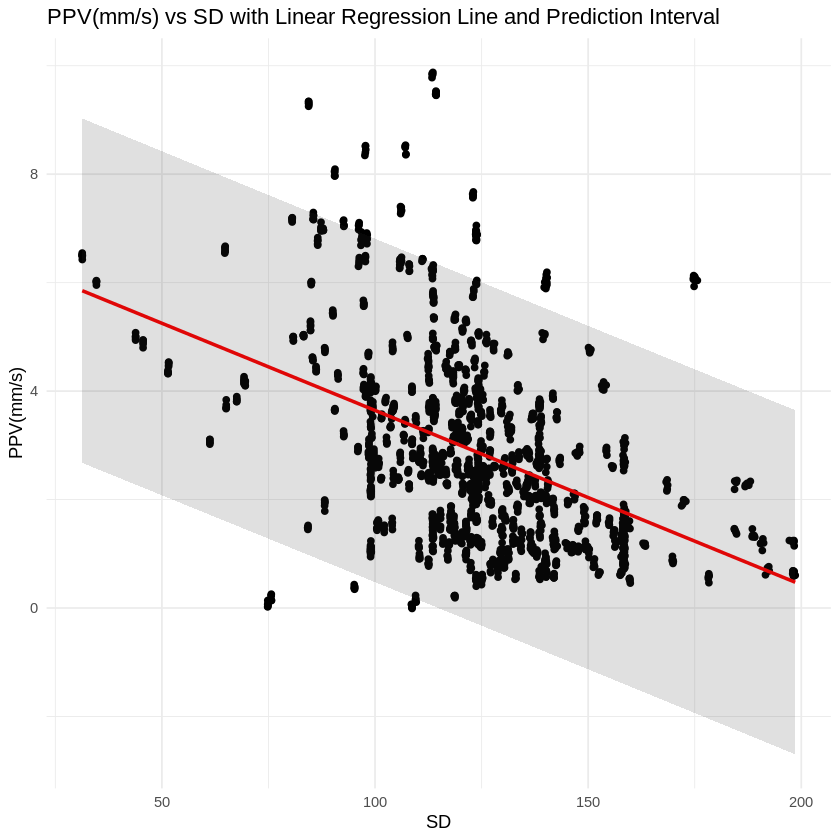

In [ ]:
# Load necessary libraries
library(ggplot2)

# Assuming your dataframe is named data and it already has the columns 'PPV.mm.s.' and 'ST'
# and data2 has columns 'PPV.train.predicted' and 'SD'

# Perform linear regression on the original data
model <- lm(PPV ~ SD, data = data)

# Summary of the model to see details
summary(model)

# Predict values with prediction intervals
predictions <- predict(model, interval = "prediction", level = 0.95)

# Add predictions and intervals to the original dataframe
data$fit <- predictions[, "fit"]
data$lwr <- predictions[, "lwr"]
data$upr <- predictions[, "upr"]

# Create the plot with the original data and regression line
p <- ggplot(data, aes(x = SD, y = PPV)) +
  geom_point(color = "black") +
  geom_smooth(method = "lm", se = FALSE, color = "red") + # Linear regression line
  geom_ribbon(aes(ymin = lwr, ymax = upr), alpha = 0.15) + # Prediction interval
  labs(title = "PPV(mm/s) vs SD with Linear Regression Line and Prediction Interval",
       x = "SD",
       y = "PPV(mm/s)") +
  theme_minimal()

p
# Assuming data2 has the new points to be plotted with columns 'PPV.train.predicted' and 'SD'
# Add new points to the existing plot
# p + geom_point(data = data_train, aes(x = SD, y = PPV.train.predicted), color = "blue")
# p + geom_point(data = data_test, aes(x = SD, y = ppv_predicted), color = "green")


#### Nuage de points du TrainSet dans l'intervale de confiance

`geom_smooth()` using formula = 'y ~ x'


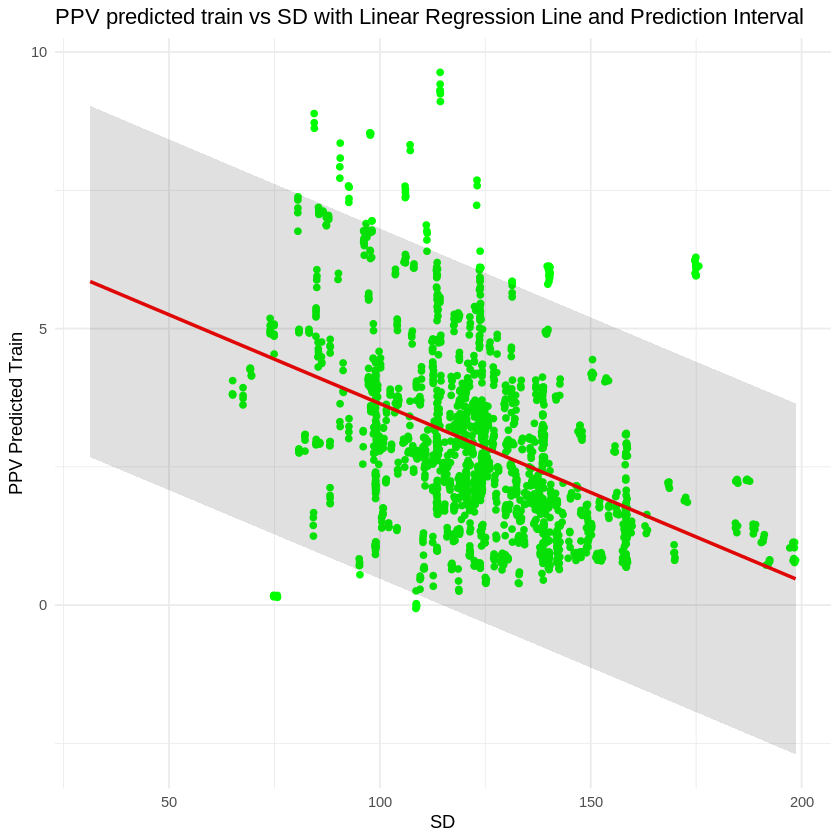

In [ ]:
ptrain <- ggplot(data, aes(x = SD, y = PPV)) +
  geom_point(data = data_train, aes(x = SD, y = PPV.train.predicted), color = "green") +
  geom_smooth(method = "lm", se = FALSE, color = "red") + # Linear regression line
  geom_ribbon(aes(ymin = lwr, ymax = upr), alpha = 0.15) + # Prediction interval
  labs(title = "PPV predicted train vs SD with Linear Regression Line and Prediction Interval",
       x = "SD",
       y = "PPV Predicted Train") +
  theme_minimal()
ptrain

#### Nuage de points du TestSet dans l'intervale de confiance

`geom_smooth()` using formula = 'y ~ x'


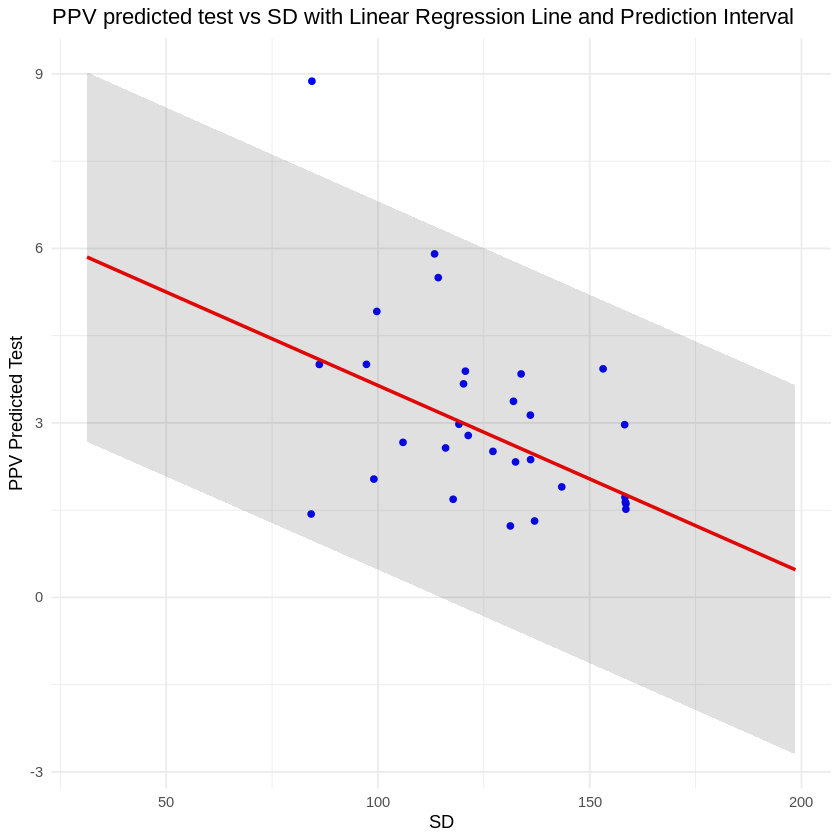

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Assuming 'data' and 'data_test' are your data frames
# Randomly sample 30 rows from data_test
data_test_subset <- data_test %>% sample_n(30)

# Plot with 30 sampled points from data_test
ptest <- ggplot(data, aes(x = SD, y = PPV)) +
  geom_point(data = data_test_subset, aes(x = SD, y = PPV.test.predicted), color = "blue") +
  geom_smooth(method = "lm", se = FALSE, color = "red") + # Linear regression line
  geom_ribbon(aes(ymin = lwr, ymax = upr), alpha = 0.15) + # Prediction interval
  labs(title = "PPV predicted test vs SD with Linear Regression Line and Prediction Interval",
       x = "SD",
       y = "PPV Predicted Test") +
  theme_minimal()

# Display the plot
ptest


`geom_smooth()` using formula = 'y ~ x'


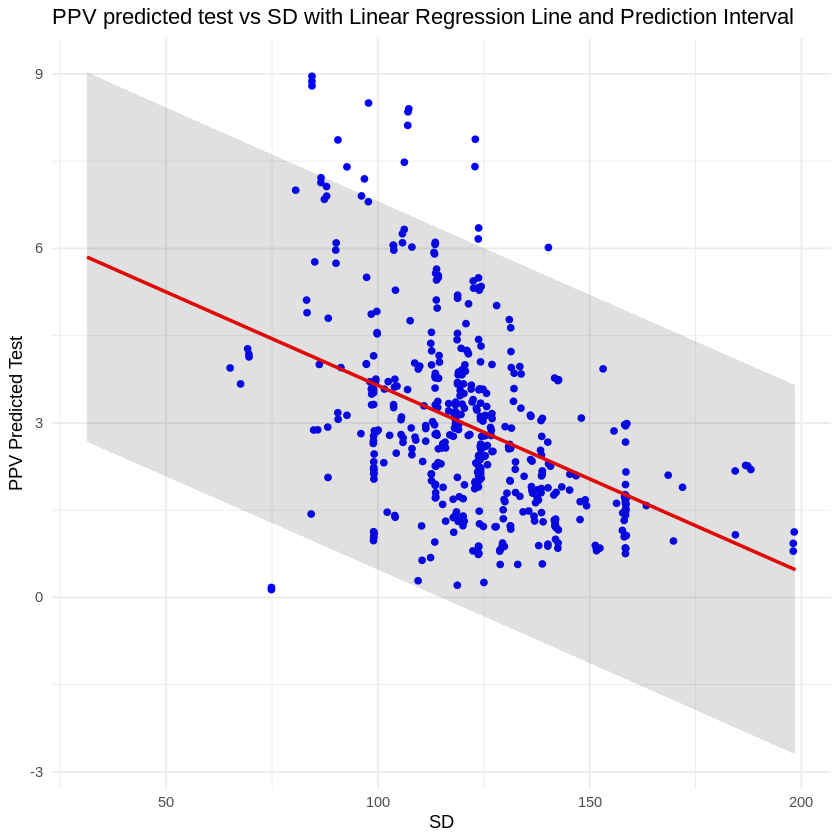

In [ ]:
ptest <- ggplot(data, aes(x = SD, y = PPV)) +
  geom_point(data = data_test, aes(x = SD, y = PPV.test.predicted), color = "blue") +
  geom_smooth(method = "lm", se = FALSE, color = "red") + # Linear regression line
  geom_ribbon(aes(ymin = lwr, ymax = upr), alpha = 0.15) + # Prediction interval
  labs(title = "PPV predicted test vs SD with Linear Regression Line and Prediction Interval",
       x = "SD",
       y = "PPV Predicted Test") +
  theme_minimal()
ptest

In [ ]:
# Save the dataframe to a CSV file
write.csv(data, file = "data2_interval.csv", row.names = FALSE)

# Confirmation message
print("Data has been saved to 'dt.csv'")

[1] "Data has been saved to 'dt.csv'"
